In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('iris-data.csv', index_col = 0)

In [3]:
df.columns

Index(['lar.sepalo', 'anc.sepalo', 'lar.petalo', 'anc.petalo', 'tipo_flor'], dtype='object')

In [4]:
df.tipo_flor.value_counts()

2.0    50
1.0    50
0.0    50
Name: tipo_flor, dtype: int64

In [5]:
# Estandarizacion de una variable:
y = df['lar.petalo']

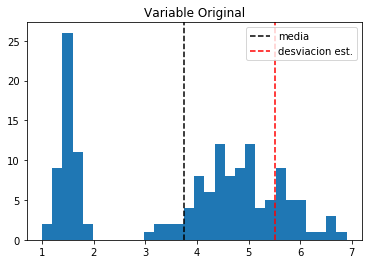

In [8]:
fig, ax = plt.subplots()
ax.set_title('Variable Original')
ax.hist(y, bins = 30)
ax.axvline(x = np.mean(y), c = 'k', label = 'media', linestyle = '--')
ax.axvline(x = np.mean(y) + np.std(y), c = 'r', label = 'desviacion est.', linestyle = '--')
ax.legend()

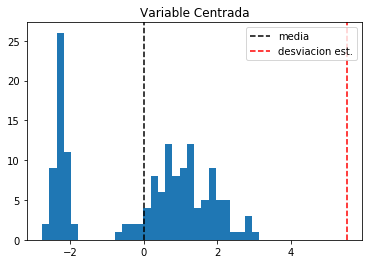

In [12]:
# 1. Centrar la variable:

fig, ax = plt.subplots()
ax.set_title('Variable Centrada')
ax.hist(y - np.mean(y), bins = 30)
ax.axvline(x = np.mean(y - np.mean(y)), c = 'k', label = 'media', linestyle = '--')
ax.axvline(x = np.mean(y) + np.std(y), c = 'r', label = 'desviacion est.', linestyle = '--')
ax.legend()

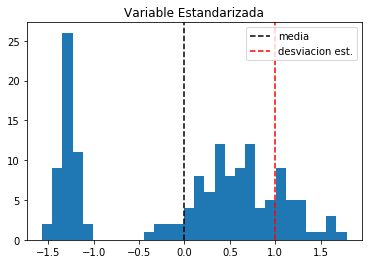

In [15]:
# 2. Reduccion de  la variable:

fig, ax = plt.subplots()
ax.set_title('Variable Estandarizada')
ax.hist((y - np.mean(y))/np.std(y), bins = 30)
ax.axvline(x = np.mean(np.mean(y - np.mean(y)))/np.std(y), c = 'k', label = 'media', linestyle = '--')
ax.axvline(x = np.mean(np.mean(y - np.mean(y)) + np.std(y - np.mean(y)))/np.std(y), c = 'r', label = 'desviacion est.', linestyle = '--')
ax.legend()

## Covarianza

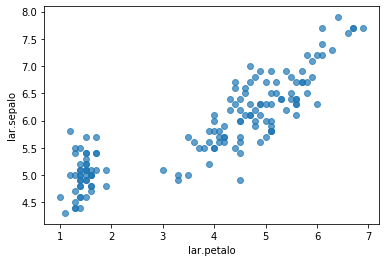

In [21]:
fig, ax = plt.subplots()
ax.scatter(df['lar.petalo'], df['lar.sepalo'], alpha = 0.7)
ax.set_xlabel('lar.petalo')
ax.set_ylabel('lar.sepalo')
ax.autoscale()

In [22]:
np.cov(df['lar.petalo'], df['lar.sepalo'])

array([[3.11627785, 1.27431544],
       [1.27431544, 0.68569351]])

## Correlacion

In [23]:
df.corr(method = 'spearman')

,lar.sepalo,anc.sepalo,lar.petalo,anc.petalo,tipo_flor
lar.sepalo,1.000000,-0.166778,0.881898,0.834289,0.798078
anc.sepalo,-0.166778,1.000000,-0.309635,-0.289032,-0.440290
lar.petalo,0.881898,-0.309635,1.000000,0.937667,0.935431
anc.petalo,0.834289,-0.289032,0.937667,1.000000,0.938179
tipo_flor,0.798078,-0.440290,0.935431,0.938179,1.000000


In [25]:
corr = df.corr(method = 'kendall')

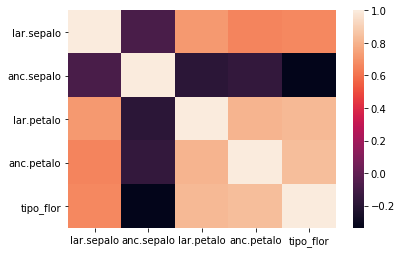

In [26]:
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)

## Estimadores a través de datos
Una variabable aleatoria que viene de una poblacion puede ser muestreada y calculada utilizando una pequeña porcion que viene de la misma.

### Parametros poblacionales
mu : Valor esperado
sigma : varianza

#### Criterios para selección de un estimador:
1. Que sea centrado (insesgado)
2. De minima varianza
3. Es deseable que sea lineal respecto a las variables de muestra

In [3]:
import sklearn
from sklearn.datasets import load_iris
from scipy import stats
from scipy.stats import norm

In [5]:
x1 = 3

mu1 = 4
mu2 = 7
sigma = 1

p_muestra = norm.pdf(x1, mu2, sigma)
p_muestra

0.00013383022576488537

In [6]:
x1 = 3
x2 = 10

mu1 = 4
mu2 = 7
sigma = 1

p_muestra = norm.pdf(x1, mu2, sigma)*norm.pdf(x2, mu2, sigma)
p_muestra

5.931152735254122e-07

In [14]:
muestra_10 = norm.rvs(5, sigma, size = 10)

In [15]:
data1 = norm.rvs(mu1, sigma, size = 100000)
data2 = norm.rvs(mu2, sigma, size = 100000)

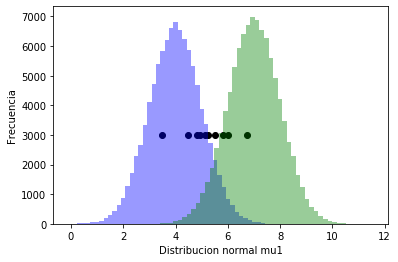

In [21]:
ax = sns.distplot(data1, bins = 50, color = 'blue', kde = False)
ax.set(xlabel = 'Distribucion normal mu1', ylabel = 'Frecuencia')

ax = sns.distplot(data2, bins = 50, color = 'green', kde = False)
ax.set(xlabel = 'Distribucion normal mu1', ylabel = 'Frecuencia')

ax = ax.scatter(muestra_10, y, c = 'k')

In [20]:
muestra_10
y = list([])
for i in range(10):
    y.append(3000)
    

## Estimadores de máxima verosimilitud
Son aquellos que han sido calculados maximizando la funcion de verosimilitud, o funcion de probabilidad de ocurrencia de la muestra.

## Distribuciones muestrales
1. Distribucion de la VA original con parámetro poblacional mu desconocido
2. Distribucion de promedio muestral como mejor estimador de mu
3. Definición de hipótesis sobre los valores de los parámetros poblacionales
4. Estandarización del promedio muestral tomando como cierta la hipotesis definida

### Funciones muestrales
1. Normal Estandar (0,1)
2. t-Student(N-1)
3. Chi-cuadrada (N-1)
4. F Fisher-Snedecor (Nx-1, Ny-1)

In [29]:
from IPython.core.display import Image
from scipy.stats import t
from scipy.stats import chi2
from scipy.stats import f

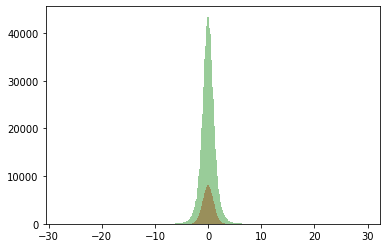

In [26]:
data1 = t.rvs(100, size = 1000000)
data2 = t.rvs(5, size = 1000000)

ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')
ax = sns.distplot(data2, bins = 500, kde = False, color = 'green')

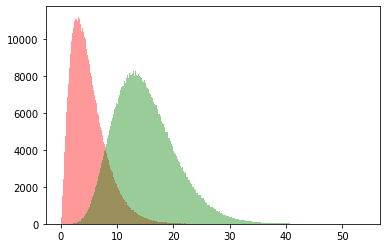

In [28]:
data1 = chi2.rvs(5, size = 1000000)
data2 = chi2.rvs(15, size = 1000000)

ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')
ax = sns.distplot(data2, bins = 500, kde = False, color = 'green')

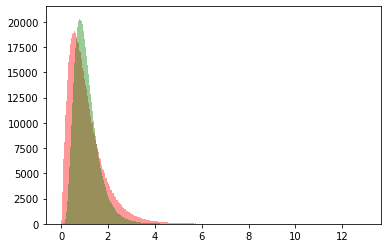

In [30]:
data1 = f.rvs(5, 25, size = 1000000)
data2 = f.rvs(15, 25, size = 1000000)

ax = sns.distplot(data1, bins = 500, kde = False, color = 'red')
ax = sns.distplot(data2, bins = 500, kde = False, color = 'green')

In [31]:
f.pdf(4, 15, 25)

0.0019800859524222187

In [32]:
f.cdf(4, 15, 25)

0.9988900520089906

In [34]:
f.ppf(0.9988900520089906, 15, 25) # Para profundizar: grados de libertad

4.000000000000022

In [35]:
f.ppf(0.5, 15, 25)

0.982011155699839

## Teorema del Límite Central
La suma de n variables aleatorias independientes, con un n > 30 tiende a una distribucion normal o la curva de campana incluso si las variables aleatorias originales no se distribuyen como una normal

In [36]:
from scipy.stats import expon
from scipy.stats import uniform

In [37]:
poblacion = pd.DataFrame()
poblacion['numbers'] = expon.rvs(40, size = 100000)

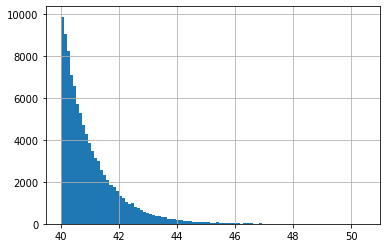

In [38]:
poblacion['numbers'].hist(bins = 100)

In [41]:
muestra_promedio = []

tamano = 500

for i in range(0, tamano):
    muestra_promedio.append(poblacion.sample(n=100).mean().values[0])

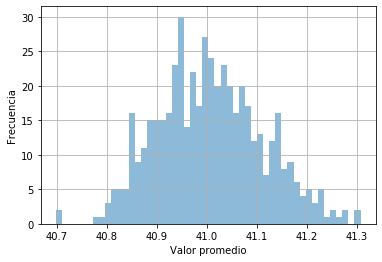

In [42]:
fig, ax = plt.subplots()
ax.hist(muestra_promedio, bins = 50, alpha = 0.5)
ax.set_xlabel('Valor promedio')
ax.set_ylabel('Frecuencia')
ax.grid()